# 자동 실행되는 트리거

* **트리거**: 자동으로 수행하여 사용자가 추가 작업을 잊어버리는 실수를 방지해준다.
* 예를 들어 회사원이 퇴사하면 직원 테이블에서 삭제하면 되는데, 나중에 퇴사한 직원이 회사 근무 기록을 요청할 수 있다.
* 이를 예방하려면 직원 테이블에서 삭제되기 전에 퇴사자 테이블에 옮겨 놓아야한다.
* 단, 이런 작업을 수동으로 할 경우 백업하지 않고 데이터를 삭제할 수 있다는 것이다.

* 트리거를 사용하게 된다면 직원 테이블에서 사원을 삭제하면 해당 데이터를 자동으로 퇴사자 테이블에 들어가도록 설정할 수 있다.
* 즉 트리거를 사용하면 데이터에 오류가 발생하는 것을 막을 수 있는데 이를 데이터의 무결성이라고 한다.

### 데이터 무결성

* 여러 사용자가 규칙없이 아무 데이터나 입력하면 데이터베이스는 엉망이 되어 사용할 수 없게 된다.
* 따라서 데이터베이스에 저장된 데이터의 값과 사용자가 의도한 데이터 값은 일치해야 한다, 데이터는 정확성, 유효성, 일관성, 신뢰성이 지켜져야 하며 이를 어기는 잘못된 갱신 또는 삭제로부터 보호되어야 한다 등의 규칙을 제정하여 데이터 무결성을 유지한다.

#### 데이터 무결성의 종류
|유형|설명|
|----|----|
|개체 무결성(Entity Integrity)|기본 키(Primary Key)로 선택된 열은 고유해야 하며 NULL값을 가질 수 없다|
|참조 무결성(Reference Intergrity)|기본 키와 외래 키의 관계, 외래 키가 있는 테이블의 경우에는 기본 키와 외래 키 간의 관계가 항상 유지됨을 보장한다. 참조하는 외래 키가 존재하면 행은 삭제될 수 없고 기본 키도 변경될 수 없다.|
|영역 무결성(Domain Integrity)|데이터 형태, 범위, 기본값, 유일성에 관한 제약조건, 주어진 속성 값은 그 속성이 정의된 도메인에 속한 값이어야 한다 <br> 예) 값이 0 이상, YN값 준수 여부, 기본값은 1 등|
|비즈니스 무결성(Business Integrity)|사용자의 업무 규칙에 따른 비즈니스적인 제약 조건 <br> 예) 제약 조건, Default, Trigger 등의 사용자 정의|


## 트리거의 기본

### 트리거의 개요

* 트리거는 테이블에 INSERT나 UPDATE 또는 DELETE 작업이 발생하면 실행되는 코드
* 테이블에서 DELETE 작업이 일어날 경우 해당 데이터가 삭제되기 전에 다른 곳에 자동으로 저장해주는 기능 -> 사용자는 더 이상 행 데이터를 삭제하기 전에 다른 곳에 저장해야 하는 부담 감소, 모든 것이 자동으로 처리되므로 삭제된 모든 사용자 정보는 완벽하게 별도의 장소에 저장될 것임

### 트리거의 기본작동

* 테이블에서 DML문(INSERT, UPDATE, DELETE 등)의 이벤트가 발생할 때 작동함
* 테이블에 미리 부착되는 프로그램 코드라고 이해
* 스토어드 프로시저와 문법이 비슷하지만, CALL문으로 직접 실행시킬 수 없음 -> 오직 테이블에 INSERT, UPDATE, DELETE 등의 이벤트가 발생할 경우에만 자동으로 실행됨
* 또한 스토어드 프로시저와 달리 IN, OUT 매개변수를 사용할 수 없다.

In [ ]:
# 간단한 트리거를 위한 테이블 생성
USE market_db;
CREATE TABLE IF NOT EXISTS trigger_table (id INT, txt VARCHAR(10));
INSERT INTO trigger_table VALUES(1, '레드벨벳');
INSERT INTO trigger_table VALUES(2, '잇지');
INSERT INTO trigger_table VALUES(3, '블랙핑크');

In [ ]:
# 테이블에 트리거 부착
DROP TRIGGER IF EXISTS myTrigger;
DELIMITER $$
CREATE TRIGGER myTrigger
	# DELETE문이 발생된 이후에 작동하라는 의미
	AFTER DELETE
    ON trigger_table
	# 각 행마다 적용
    FOR EACH ROW
BEGIN
# 트리거에서 실제로 작동할 부분
SET @msg = '가수 그룹이 삭제됨' ;  -- 트리거 실행 시 작동되는 코드들
END $$
DELIMITER ;

In [ ]:
# INSERT, UPDATE문 사용
SET @msg = '';
INSERT INTO trigger_table VALUES(4, '마마무');
SELECT @msg;
UPDATE trigger_table SET txt = '블핑' WHERE id = 3;
SELECT @msg;

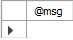

* 위와 같이 결과를 보면 아무것도 나오지 않았는데, trigger_table에는 DELETE에만 작동하는 트리거를 부착했기 때문에 INSERT, UPDATE문을 실행해도 트리거가 작동하지 않아서 빈 @msg가 그대로 출력되는 것이다.

In [ ]:
# DELETE문을 테이블에 적용
DELETE FROM trigger_table WHERE id = 4;
SELECT @msg;

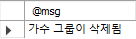

* DELETE문이 실행되니 트리거가 작동해서 @msg 변수에 트리거에서 설정한 내용이 입력된 것을 확인할 수 있다.

## 트리거 활용

* 트리거는 테이블에 입력/수정/삭제되는 정보를 백업하는 용도로 활용할 수 있다.
* 은행을 예로 들면, 은행 창구에서 새로 계좌를 만들때는 INSERT 사용, 계좌에 입금하거나 출금하면 UPDATE를 사용해서 값을 변경, 계좌를 폐기하면 DELETE가 작동
* 그런데 계좌라는 중요한 정보를 누가 입력/수정/삭제했는지 알 수 없다면 나중에 계좌에 문제가 발생했을 때 원인을 파악할 수 없을 것이다.
* 이럴 때를 대비해서 데이터의 입력/수정/삭제가 발생할 때, 트리거를 자동으로 작동시켜 데이터를 변경한 사용자와 시간 등을 기록할 수 있음

In [ ]:
# 고객 테이블에 입력된 회원의 정보가 변경될 때 변경한 사용자, 시간, 변경 전의 데이터 등을 기록하는 트리거
USE market_db;
CREATE TABLE singer (SELECT mem_id, mem_name, mem_number, addr FROM member);

In [ ]:
# 변경되기 전의 데이터를 저장할 백업 테이블 미리 생성
# 백업 테이블에는 추가로 수정 또는 삭제인지 구분할 변경된 타입, 변경된 날짜, 변경한 사용자를 추가
CREATE TABLE backup_singer
(mem_id CHAR(8) NOT NULL,
mem_name VARCHAR(10) NOT NULL,
mem_number INT NOT NULL,
addr CHAR(2) NOT NULL,
modType CHAR(2),  -- 변경된 타입, '수정' 또는 '삭제'
modDate DATE,  -- 변경된 날짜
modUser VARCHAR(30)  -- 변경한 사용자
);

In [ ]:
# 변경과 삭제가 발생할 때 작동하는 트리거를 singer 테이블에 부착 -> 변경이 발생했을 때 작동하는 singer_updateTrg 생성
DROP TRIGGER IF EXISTS singer_updateTrg;
DELIMITER $$
CREATE TRIGGER singer_updateTrg
	AFTER UPDATE
    ON singer
    FOR EACH ROW
BEGIN
    # OLD테이블은 UPDATE나 DELETE가 수행될 때, 변경되기 전의 데이터가 잠깐 저장되는 임시 테이블
    # OLD테이블에 UPDATE문이 작동되면 이 행에 의해서 업데이트가 되기 전의 데이터가 백업 테이블에 입력됨(원래 데이터가 보존)
	INSERT INTO backup_singer VALUES(OLD.mem_id, OLD.mem_name,
		OLD.mem_number, OLD.addr, '수정', CURDATE(), CURRENT_USER() );
END $$
DELIMITER ;

In [ ]:
# 삭제가 발생했을 때 작동하는 singer_deleteTrg 트리거 생성
DROP TRIGGER IF EXISTS singer_deleteTrg;
DELIMITER $$
CREATE TRIGGER singer_deleteTrg  -- 트리거 이름
	AFTER DELETE  -- 삭제 후 작동하도록 지정
    ON singer  -- 트리거를 부착할 테이블
    FOR EACH ROW
BEGIN
	INSERT INTO backup_singer VALUES(OLD.mem_id, OLD.mem_name,
		OLD.mem_number, OLD.addr, '삭제', CURDATE(), CURRENT_USER() );
END $$
DELIMITER ;

In [ ]:
# 데이터 변경
UPDATE singer 
SET addr = '영국'
WHERE mem_id = 'BLK';
DELETE FROM singer 
WHERE mem_number >= 7;

In [ ]:
# 백업 데이터 조회
SELECT * FROM  backup_singer;

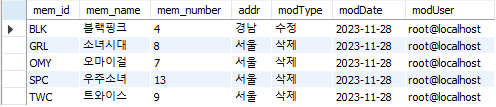

In [ ]:
# 테이블의 모든 행 데이터 삭제
TRUNCATE TABLE singer;

In [ ]:
# 백업 데이터 조회
SELECT * FROM  backup_singer;

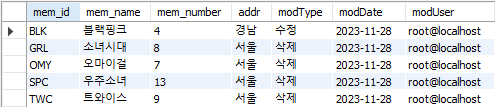

* 삭제가 잘 되었는지 백업 테이블을 확인해본 결과, 삭제된 내용이 들어가지 않았다.
* 이유는 TRUNCATE TABLE로 삭제시에는 트리거가 작동하지 않기 때문
* DELETE 트리거는 오직 DELETE문에만 작동한다.

## 트리거가 작동하는 임시 테이블

* 테이블에 INSERT, UPDATE, DELETE 작업이 수행되면 임시로 사용되는 시스템 테이블이 2개 있는데, 이름은 NEW와 OLD이다.
* NEW 테이블은 INSERT문이 실행되면 다음 그림과 같이 작동한다.

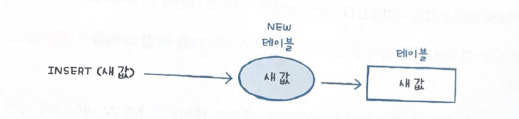

* 지금까지 배운 바로는 INSERT(새 값) 형태로 테이블에 새 값이 바로 들어간다. 하지만 새 값은 테이블에 들어가기 전에 NEW 테이블에 잠깐 들어가 있는다.
* NEW테이블은 많이 사용되지 않음 -> NEW테이블에 들어간 값은 테이블에 들어가 있으므로

* DELETE(예전 값)의 작동을 알아보자. OLD테이블은 DELETE문이 실행되면 다음과 같이 작동한다.

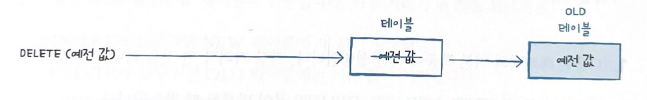

* 삭제될 예전 값이 삭제되기 전에 OLD테이블에 잠깐 들어가 있는다.
* 그래서 AFTER DELETE트리거를 만들어도 삭제된 후에 OLD.열 이름 형식으로 예전 값에 접근할 수 없었던 것임

* 마지막으로 UPDATE(새 값, 예전 값)을 사용하면 다음과 같이 NEW테이블과 OLD테이블을 모두 사용한다.

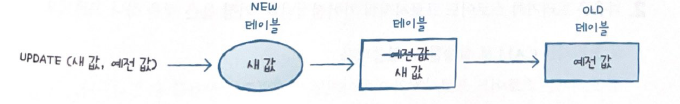

* 이제 singer_deleteTrg 트리거의 INSERT문 안에 있는 OLD.열 이름의 의미를 파악했을 것이다.